<a href="https://colab.research.google.com/github/shivupoojar/Outlier-Detection-for-Puhatu-Monitoring-/blob/main/combined_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from google.colab import files
from google.colab import files
import io
#uploaded1 = files.upload()

df=pd.read_csv(io.BytesIO(uploaded1['proper_data.csv']),parse_dates=['time'],usecols=['time','wat_level_mH2o','dev_id','batt','rssi','snr','air_Pressure_mH2o','air_Temp_float','dist','wat_Pressure_mH2o','wat_Temp_float'])

In [ ]:
!pip3 install pyod

In [ ]:
df = df.loc[df['dev_id'] == 'puhatu_c2']
df = df.apply(pd.to_numeric, errors='coerce')
df['time'] = df['time'].astype('datetime64[ns]')
df = df.drop(['dev_id'], axis=1)
df.set_index('time',inplace=True)
#df = df.dropna()
print(df.shape)
#df = df.dropna()
df['month']= df.index.month
df['year']= df.index.year
df = df.loc[df['year'] == 2021]
df.describe().to_csv('describec2.csv') 
files.download('describec2.csv')

df.corr().to_csv("corrc2.csv")
files.download('corrc2.csv')




(2245, 9)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
#series = read_csv('daily-total-female-births.csv', header=0, index_col=0, squeeze=True)
#X = series.values


for col in df.columns:
    print(col)
    df1= df[col]
    
    df1 = df1.dropna()
    print(df1.shape)
   # df1 = df1.resample('D').mean()
   
    result = adfuller(df1)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print("This is for", col)
        print('\t%s: %.3f' % (key, value))
 #   decompose  = seasonal_decompose(df[col].resample('D').sum(),freq=12)
 #   fig = plt.figure()
#    print(col)
 #   fig = decompose.plot()
 #   fig.set_size_inches(12,8)

    

air_Pressure_mH2o
(1,)


ValueError: ignored

In [ ]:
    decompose  = seasonal_decompose(df1.loc['2021',col].resample('D').sum(),freq=12)
    fig = plt.figure()
    print(col)
    fig = decompose.plot()
    fig.set_size_inches(12,8)

In [ ]:
# Function that calculates the percentage of missing values
def calc_percent_NAs(df):
    nans = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns=['percent']) 
    idx = nans['percent'] > 0
    return nans[idx]
# Let's use above function to look at top ten columns with NaNs
calc_percent_NAs(df).head(10)

,percent
wat_level_mH2o,0.777170
air_Temp_float,0.348195
air_Pressure_mH2o,0.343670
wat_Temp_float,0.228957
wat_Pressure_mH2o,0.209633
dist,0.106890
snr,0.009237
batt,0.000189


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1136: UserWarning: Attempting to set identical left == right == 18796.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1136: UserWarning: Attempting to set identical left == right == 18796.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


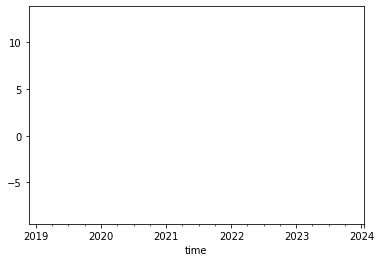

In [ ]:
df.describe().to_csv("my_description.csv")
df['month']= df.index.month
df['year']= df.index.year
df = df.resample('D').mean()

#df['rssi'].plot();
df['snr'].plot();
df['air_Pressure_mH2o'].plot();

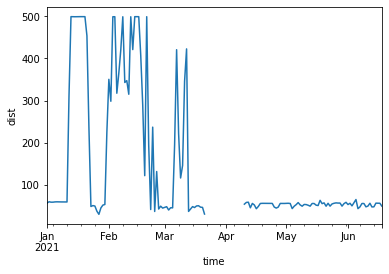

In [ ]:
ax = df.loc['2021', 'dist'].plot()
ax.set_ylabel('dist');

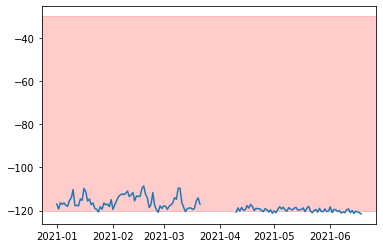

In [ ]:
plt.plot(df.loc['2021','rssi'])
plt.axhspan(-30, -120, alpha=0.2, color='red')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1136: UserWarning: Attempting to set identical left == right == 18796.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1136: UserWarning: Attempting to set identical left == right == 18796.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


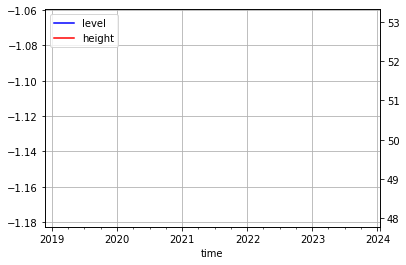

In [ ]:
# correlation between rssi and temperature
ax1 = df.loc['2021','wat_level_mH2o'].plot(color='blue', grid=True, label='level')
ax2 = df.loc['2021','dist'].plot(color='red', grid=True, secondary_y=True, label='height')


h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

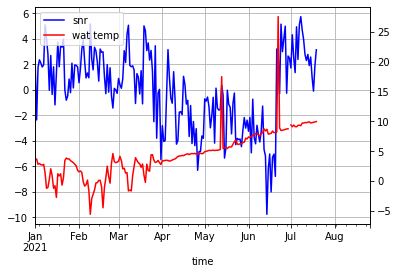

In [ ]:
#correlation between snr and temperature
ax1 = df.loc['2021','snr'].plot(color='blue', grid=True, label='snr')
ax2 = df.loc['2021','wat_Temp_float'].plot(color='red', grid=True, secondary_y=True, label='wat temp')


h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

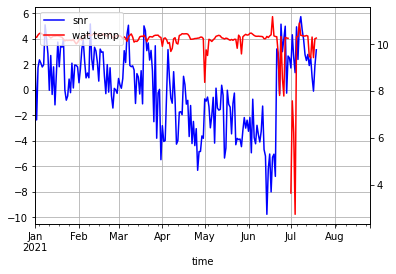

In [ ]:
#correlation between snr and temperature
ax1 = df.loc['2021','snr'].plot(color='blue', grid=True, label='snr')
ax2 = df.loc['2021','air_Pressure_mH2o'].plot(color='red', grid=True, secondary_y=True, label='wat temp')


h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

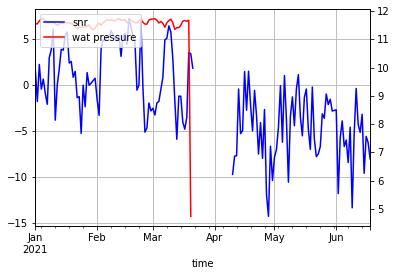

In [ ]:
#correlation between snr and pressure
ax1 = df.loc['2021','snr'].plot(color='blue', grid=True, label='snr')
ax2 = df.loc['2021','wat_Pressure_mH2o'].plot(color='red', grid=True, secondary_y=True, label='wat pressure')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

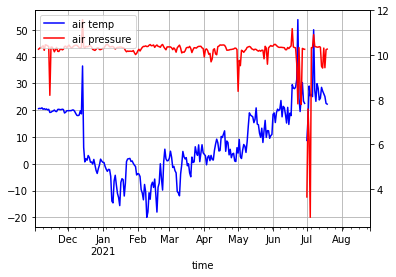

In [ ]:
# Relation between air temp and air pressure
ax1 = df.loc['2020-10':'2021-09','air_Temp_float'].plot(color='blue', grid=True, label='air temp')
ax2 = df.loc['2020-10':'2021-09','air_Pressure_mH2o'].plot(color='red', grid=True, secondary_y=True, label='air pressure')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

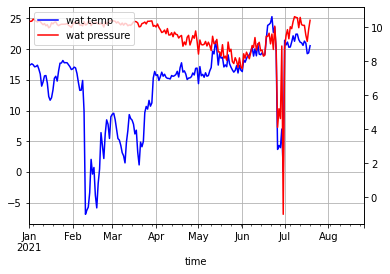

In [ ]:
#correlation between snr and pressure
ax1 = df.loc['2021','wat_Temp_float'].plot(color='blue', grid=True, label='wat temp')
ax2 = df.loc['2021','wat_Pressure_mH2o'].plot(color='red', grid=True, secondary_y=True, label='wat pressure')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

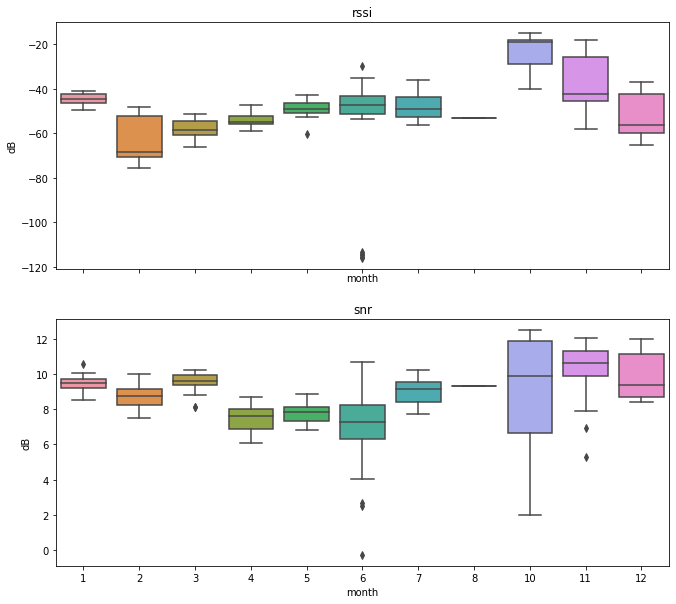

In [ ]:
# box plot for rssi

fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['rssi','snr'], axes):
    sns.boxplot(data=df, x='month', y=name, ax=ax)
    ax.set_ylabel('dB')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot


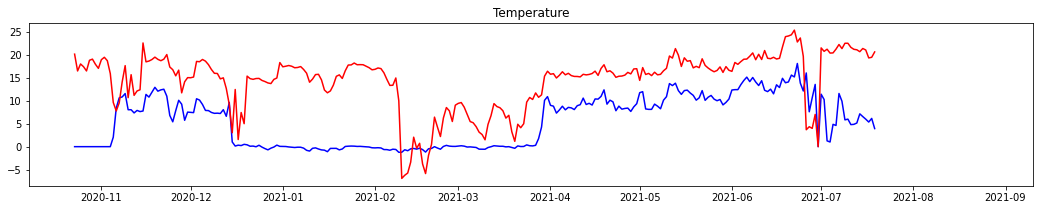

In [ ]:
    _ = plt.figure(figsize=(18,3))
 #   _ = plt.plot(broken[name], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(df['air_Temp_float'], color='blue')
    _  = plt.plot(df['wat_Temp_float'], color='red')
    _ = plt.title('Temperature')
    plt.show()

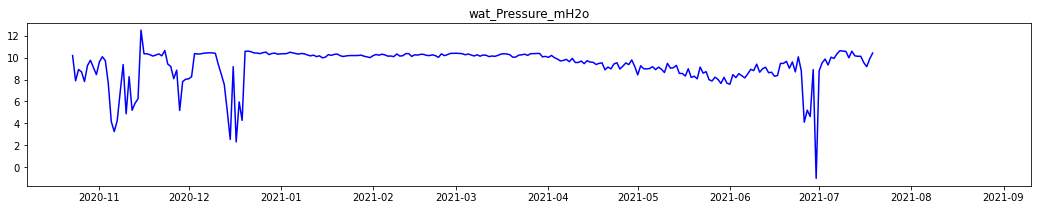

In [ ]:
    _ = plt.figure(figsize=(18,3))
 #   _ = plt.plot(broken[name], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(df['wat_Pressure_mH2o'], color='blue')
    _ = plt.title('wat_Pressure_mH2o')
    plt.show()

In [ ]:

rollmean = df.resample(rule='M').mean()
rollstd = df.resample(rule='M').std()


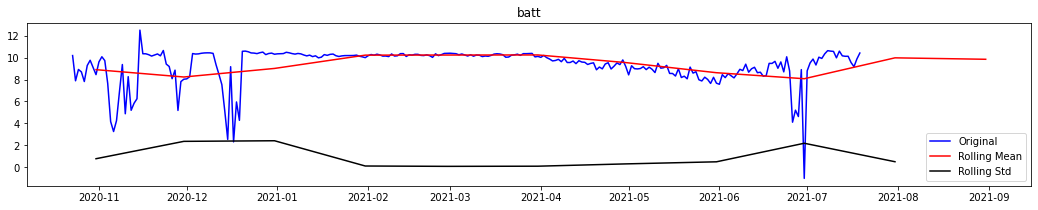

In [ ]:
_ = plt.figure(figsize=(18,3))
_ = plt.plot(df['wat_Pressure_mH2o'], color='blue', label='Original')
_ = plt.plot(rollmean['wat_Pressure_mH2o'], color='red', label='Rolling Mean')
_ = plt.plot(rollstd['wat_Pressure_mH2o'], color='black', label='Rolling Std' )
_ = plt.legend(loc='best')
_ = plt.title('batt')
plt.show()

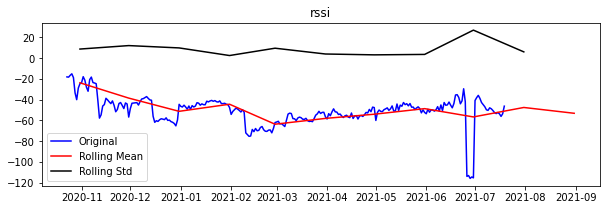

In [ ]:
_ = plt.figure(figsize=(10,3))
_ = plt.plot(df['rssi'], color='blue', label='Original')
_ = plt.plot(rollmean['rssi'], color='red', label='Rolling Mean')
_ = plt.plot(rollstd['rssi'], color='black', label='Rolling Std' )
_ = plt.legend(loc='best')
_ = plt.title('rssi')
plt.show()

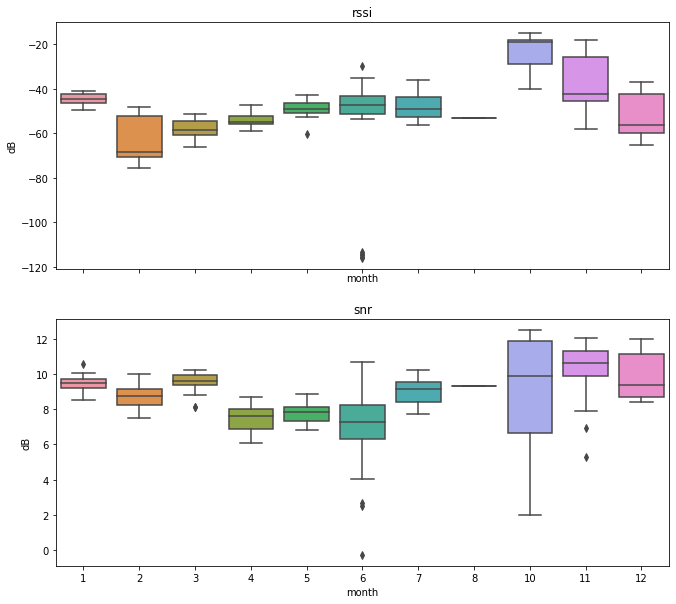

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['rssi', 'snr'], axes):
    sns.boxplot(data=df, x='month', y=name, ax=ax)
    ax.set_ylabel('dB')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

In [ ]:
# tred analysis


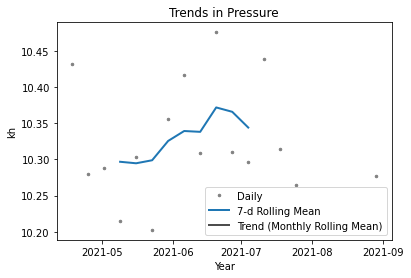

In [ ]:
import matplotlib.dates as mdates
df_roll7 = df.rolling(window=7, center=True, min_periods=7).mean()
df_roll365 = df.rolling(window=30, center=True, min_periods=30).mean()

fig, ax = plt.subplots()
ax.plot(df['air_Pressure_mH2o'], marker='.', markersize=5, color='0.5',
linestyle='None', label='Daily')
ax.plot(df_roll7['air_Pressure_mH2o'], linewidth=2, label='7-d Rolling Mean')
ax.plot(df_roll365['air_Pressure_mH2o'], color='0.3', linewidth=2,
label='Trend (Monthly Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('kh')
ax.set_title('Trends in Pressure');

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import plotly.express as px


import matplotlib.font_manager
from pyod.models.cblof import CBLOF
# Import models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
#from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from sklearn.cluster import DBSCAN
from pyod.models.ocsvm import OCSVM
# reading the big mart sales training data
from sklearn.preprocessing import MinMaxScaler

from joblib import dump, load

from sklearn.metrics import classification_report,accuracy_score

In [ ]:
# read the csv
df=pd.read_csv(io.BytesIO(uploaded1['combined.csv']),parse_dates=['time'],usecols=['time','batt','dev_id','rssi','snr','air_Pressure_mH2o','air_Temp_float','dist','wat_Pressure_mH2o','wat_Temp_float'])
#df=pd.read_csv("C:\Poojara Research\FALL 2020\Puhatu\exported_raw_data\puhatu.csv",parse_dates=['time'],usecols=['time','batt','dev_id','rssi','snr','air_Pressure_mH2o','air_Temp_float','dist','wat_Pressure_mH2o','wat_Temp_float'])
# convert feautures from string to float
df = df.apply(pd.to_numeric, errors='coerce')

# convert date time format
df['time'] = df['time'].astype('datetime64[ns]')

# drop device_id
df = df.drop(['dev_id'], axis=1) 

# drop the null values
df = df.dropna()
df.drop_duplicates()
df5= df
df = df.sample(frac=1)



In [ ]:
# min max scalling
scaler = MinMaxScaler(feature_range=(0, 1))
df[['wat_Pressure_mH2o','air_Pressure_mH2o','air_Temp_float','wat_Temp_float','dist']] = scaler.fit_transform(df[['wat_Pressure_mH2o','air_Pressure_mH2o','air_Temp_float','wat_Temp_float','dist']])

X = df[['wat_Pressure_mH2o','air_Pressure_mH2o','air_Temp_float','wat_Temp_float','dist']]

In [ ]:
# declare the outlier mechanisms
import warnings
warnings.filterwarnings('ignore')

random_state = np.random.RandomState(42)
outliers_fraction = 0.09
# Define seven outlier detection tools to be compared
classifiers = {
     #    'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
     #    'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
        #'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
     #    'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(n_estimators=35,contamination=outliers_fraction,random_state=random_state),
     #    'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
      #  'Average KNN': KNN(method='mean',contamination=outliers_fraction),
        'One Class SVM': OCSVM(contamination=outliers_fraction)
          
}

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from sklearn.model_selection import train_test_split


xx , yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))
import seaborn as sns
for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    xtrain, xtest = np.array_split(X,2)
 #   xtrain, xtest, labels_train, labels_test = train_test_split(df, df['batt'], test_size=0.50, random_state=42)  
    clf.fit(xtrain)
    
    
   # prediction of a datapoint category outlier or inlier
    prediction_labels_train = clf.predict(xtrain)
    prediction_labels = clf.predict(xtest)
    prediction_score_xtrain = clf.decision_function(xtrain)
    prediction_score_xtest = clf.decision_function(xtest)
  
    
    
    y_true = prediction_labels_train
    y_pred = prediction_labels
    
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1) 

    dfx = xtest
    
    dfx['outlier'] = y_pred.tolist()
   
    print('################################## START ######################')
    print('Accuracy Score: ', accuracy_score(y_true, y_pred),clf_name)
    print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)
    
    print(confusion_matrix(y_true, y_pred))

    print(classification_report(y_true, y_pred))

    # evaluate and print the results
   # print("\nOn Training Data:")
   # evaluate_print(clf_name, y_true, prediction_score_xtrain)
   # print("\nOn Test Data:")
  #  evaluate_print(clf_name, y_pred, prediction_score_xtest)
    print('################################## END ######################')

################################## START ######################
Accuracy Score:  0.841293933500925 Isolation Forest
OUTLIERS :  1822 INLIERS :  19261 Isolation Forest
[[17550  1635]
 [ 1711   187]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     19185
           1       0.10      0.10      0.10      1898

    accuracy                           0.84     21083
   macro avg       0.51      0.51      0.51     21083
weighted avg       0.84      0.84      0.84     21083

################################## END ######################
################################## START ######################
Accuracy Score:  0.8408670492814115 One Class SVM
OUTLIERS :  1817 INLIERS :  19266 One Class SVM
[[17548  1637]
 [ 1718   180]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     19185
           1       0.10      0.09      0.10      1898

    accuracy                           0.84     21083
  